# Crime EDA

## Primary question

Our primary question that will drive our data exploration, posed from the Mayor of Charlotte, North Carolina who is up for re-election in two years. She wants measureable (and visible) results so she can begin to campaign on her accomplishments next year.

What policy measures can be undertaken that will reduce crime rate crime the most?

Secondary questions: Are crime rates higher or lower in Charlotte that in other counties? What counties have the highest levels of crime? Which have the lowest?

## Variables

The crime_v2 dataset provided by (political organization) for this study includes 25 variables of interest..

These variables include..

<center>Data Dictionary</center>

Category | Variable
---------- | -------------------------------
Crime Rate | crmrte
Geographic | county, west, central
Demographic | urban, density, pctmin80, pctymle
Economic - Wage | wcon, wtuc, wtrd, wfir, wser, wmfg, wfed, wsta, wloc
Economic - Revenue  | taxpc
Law Enforcment | polpc, prbarr, prbconv, mix
Judicial/Sentencing | prbpris, avgsen
Time Period | year

<center>Table 1: Data Dictionary</center>

## Data Prep

In [26]:
library(dplyr)
library(ggplot2)
library(reshape2)

install.packages("gridExtra")
library(gridExtra)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
dfCrime = read.csv("crime_v2.csv")

In [5]:
str(dfCrime)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [6]:
head(dfCrime)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [7]:
tail(dfCrime)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [10]:
summary(dfCrime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

First, we note there are missing rows in the dataset that were imported. We'll remove those rows now.

In [12]:
nrow(dfCrime)
dfCrime <-na.omit(dfCrime) # omit the NA rows
nrow(dfCrime)

[1] 97

[1] 91

Next, we will inspect the data to see if there are duplicate records

In [13]:
dfCrime[duplicated(dfCrime),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


A duplicate row exists. We'll remove it.

In [14]:
dfCrime <- dfCrime[!duplicated(dfCrime),] # remove the duplicated row
nrow(dfCrime)

[1] 90

We also saw that pbconv was coded as a level. It is not a level but a ratio. We'll change that now.

In [15]:
dfCrime$prbconv<-as.numeric(levels(dfCrime$prbconv))[dfCrime$prbconv]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

We also notice by comparision of pctymle and pctmin80 one of the variables is off by a factor of 100. We will divide pctmin80 by 100 so the two variables are in the same unit terms.

In [16]:
dfCrime$pctmin80<-dfCrime$pctmin80/100

County was expressed as a number. However, it is a categorical variable and we will convert it to a factor instead.

In [17]:
dfCrime$county<-as.factor(dfCrime$county)

Next we inspect the indicator variables to see if they were coded correctly.

In [18]:
dfCrime %>% group_by(west, central) %>% tally()

west,central,n
0,0,35
0,1,33
1,0,21
1,1,1


One county was either mis-coded, or it truly belongs to both regions. However, this is very unlikely as the intended technique is to widen the data and introduce indicator variables for each category. It is not likley the data was captured for both categories.

We will need further analysis on this datapoint as it relates to the rest of the data.

For now, we will encode a new region variable and place the datapoint in its own category. 

In [19]:
#Map central and west to a region code, and create a new category for other
# Note that county 71 has both western and central codes
dfCrime$region <- case_when (
            (dfCrime$central ==0 & dfCrime$west ==0) ~ 0, #Eastern, Coastal, Other
            (dfCrime$central ==0 & dfCrime$west ==1) ~ 1, #Western
            (dfCrime$central ==1 & dfCrime$west ==0) ~ 2, #Central
            (dfCrime$central ==1 & dfCrime$west ==1) ~ 3, #Central-Western border county - this could be Charlotte or it could be a coding error.
        )

By way of the 1980 Census fact sheet, we discover the urban field is an encoding for SMSA (Standard Metropolitan Statistical Areas). https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu8011uns_bw.pdf
The value is one if the county is inside a metropolitan area. Otherwise, if the county is outisde a metropolitan area, the value is zero.
We create a metro factor variable to better describe this feature.

In [20]:
# create factor for SMSA (standard metropolitan statistical areas) with two levels - inside or outside
#    https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu8011uns_bw.pdf
dfCrime$metro =
            factor( dfCrime$urban , levels = 0:1 , labels =
                    c( 'Outside',
                       'Inside'
                      )
                   )

Next we will visualize each variable and its relationship to the variable crmrte through scatter plots

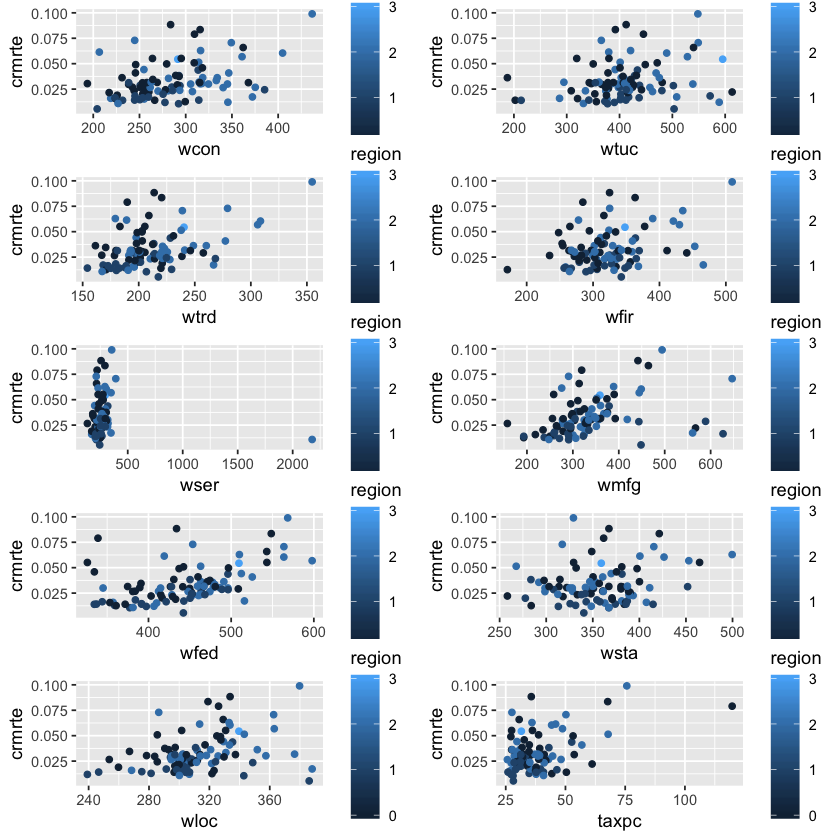

In [61]:
#Plot of the economic and tax related variables vs crmrte
q1<-ggplot(data = dfCrime, aes(x = wcon, y = crmrte, color = region)) + 
      geom_point()
q2<-ggplot(data = dfCrime, aes(x = wtuc, y = crmrte, color = region)) + 
      geom_point()
q3<-ggplot(data = dfCrime, aes(x = wtrd, y = crmrte, color = region)) + 
      geom_point()
q4<-ggplot(data = dfCrime, aes(x = wfir, y = crmrte, color = region)) + 
      geom_point()
q5<-ggplot(data = dfCrime, aes(x = wser, y = crmrte, color = region)) + 
      geom_point()
q6<-ggplot(data = dfCrime, aes(x = wmfg, y = crmrte, color = region)) + 
      geom_point()
q7<-ggplot(data = dfCrime, aes(x = wfed, y = crmrte, color = region)) + 
      geom_point()
q8<-ggplot(data = dfCrime, aes(x = wsta, y = crmrte, color = region)) + 
      geom_point()
q9<-ggplot(data = dfCrime, aes(x = wloc, y = crmrte, color = region)) + 
      geom_point()
q10<-ggplot(data = dfCrime, aes(x = taxpc, y = crmrte, color = region)) + 
      geom_point()
grid.arrange(q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, ncol=2)

We observe a few data points of interest in the comparison above, notably, wser and taxpc appear to have extreme data points

Other variables show outliers as well, but not as extreme. We will see if any of these points have leverage or influence.

In [84]:
dfCrime %>%
filter(wser > 2000)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,region,metro
185,87,0.0108703,0.195266,2.12121,0.442857,5.38,0.0012221,0.3887588,40.82454,⋯,264.4231,2177.068,247.72,381.33,367.25,300.13,0.04968944,0.07008217,2,Outside


This average service wage for 1987 is much too high compared to what we know about the 1980s and every other wage recorded in comparison. We will adjust this wage by replacing it with the average from the sample population.

In [87]:
dfCrime$wser[which(dfCrime$county==185)]<- mean(dfCrime$wser)
dfCrime$wser[which(dfCrime$county==185)]

[1] 275.3379

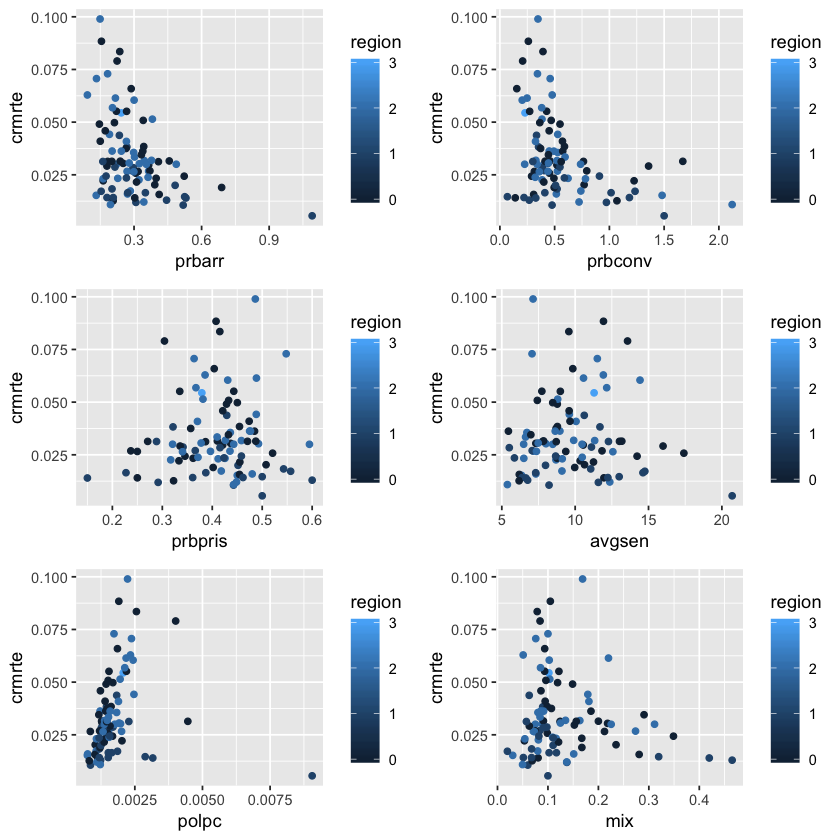

In [42]:
#Plot of the criminal justice and law enforcment related variables vs crmrte
q1<-ggplot(data = dfCrime, aes(x = prbarr, y = crmrte, color = region)) + 
      geom_point()
q2<-ggplot(data = dfCrime, aes(x = prbconv, y = crmrte, color = region)) + 
      geom_point()
q3<-ggplot(data = dfCrime, aes(x = prbpris, y = crmrte, color = region)) + 
      geom_point()
q4<-ggplot(data = dfCrime, aes(x = avgsen, y = crmrte, color = region)) + 
      geom_point()
q5<-ggplot(data = dfCrime, aes(x = polpc, y = crmrte, color = region)) + 
      geom_point()
q6<-ggplot(data = dfCrime, aes(x = mix, y = crmrte, color = region)) + 
      geom_point()

grid.arrange(q1, q2, q3, q4, q5, q6, ncol=2)

The criminal justice and law enforcement variables also show evidence of possible outliers, notably, pbarr and polpc appear to have extreme data points

We also see that prbarr and prbconv have values greater than 1. However, these are not true probabity numbers and are instead ratios used as a stand in for the true probability numbers.

There is a possibility of higher arrests per incident for an area. Meaning, the area has low incidents in general but when there were incidents there were also multiple arrests. The same case can be made for the convictions per arrest variable which we see is for a different region. In that county there may have been multiple charges brought per one arrest.


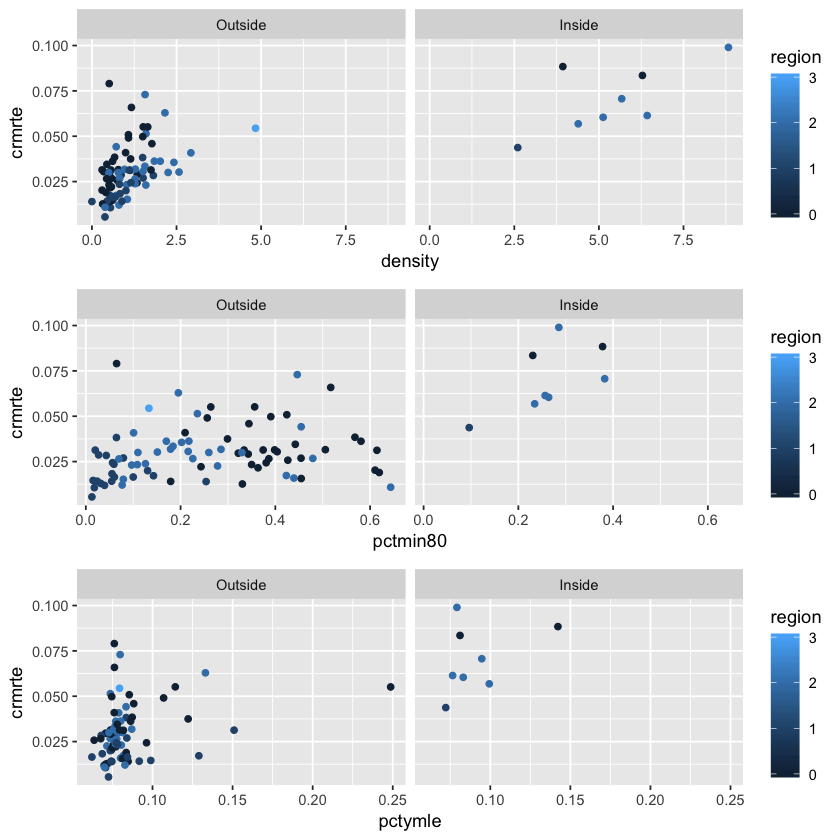

In [88]:
#plot of demographic information for counties Outside and Inside the metro areas
# population density, percent minority, percent young male

q1<-ggplot(data = dfCrime, aes(x = density, y = crmrte, color = region)) + 
      geom_point() + facet_wrap(~ metro)
q2<-ggplot(data = dfCrime, aes(x = pctmin80, y = crmrte, color = region)) + 
      geom_point() + facet_wrap(~ metro)
q3<-ggplot(data = dfCrime, aes(x = pctymle, y = crmrte, color = region)) + 
      geom_point()+ facet_wrap(~ metro)

grid.arrange(q1, q2, q3, ncol=1)

Notably more outliers are observed in demographic information. Here, pctymle in one county outside of a metro area is nearly 25%. That seems quite high in normal statistical measures of the population. It is likely an outlier. 

Finally, we can see our bright blue region 3 county and notice its population density. Its behavior is more similar to an inside metro area. Than outside. In addition to be coded for both western and central regions, it appears to be miscoded here as well.

There is likely a data transcription error where a column was not enterered correctly and it continued on to the next column where the region variables are encoded. We will put this information in our back pocket.

Next, we will create histograms for each variable

No id variables; using all as measure variables


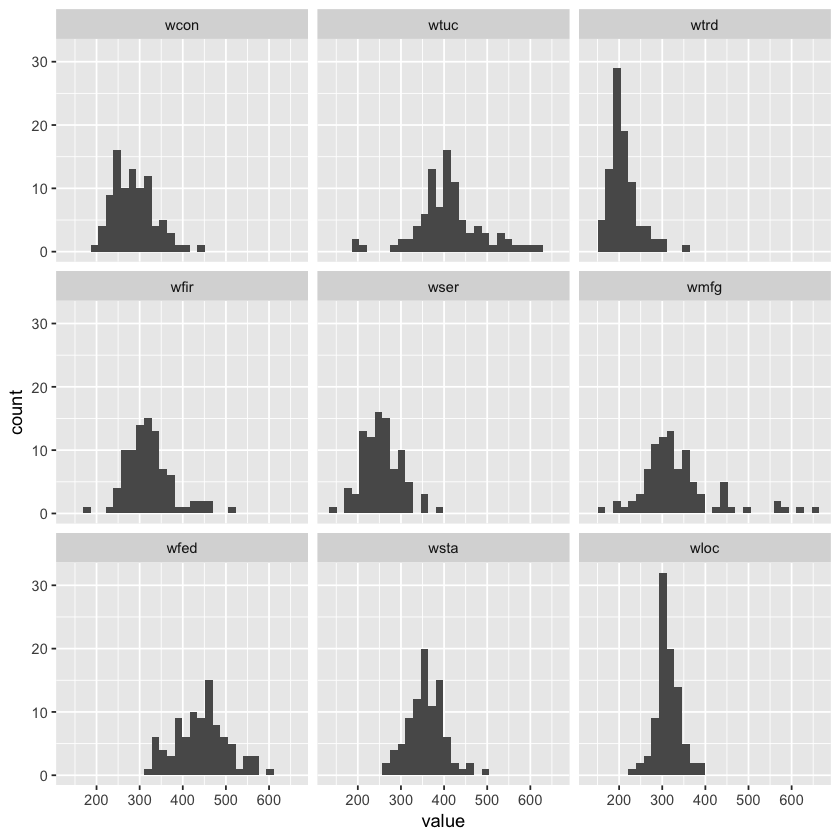

In [121]:
dfEconVars <- as.data.frame(cbind(dfCrime$wcon, dfCrime$wtuc, dfCrime$wtrd, dfCrime$wfir, dfCrime$wser, dfCrime$wmfg, dfCrime$wfed, dfCrime$wsta, dfCrime$wloc))
names(dfEconVars) <- c('wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 
                              'wmfg', 'wfed', 'wsta', 'wloc')

ggplot(melt(dfEconVars),aes(x=value)) + geom_histogram(bins=30) + facet_wrap(~variable)

Each histogram for the wage information looks  evenly distributed. We have no further remark at this time. We move to the justice an law enforcement variables. With these variables being mostly < 1 we'll also take the log for comparison.

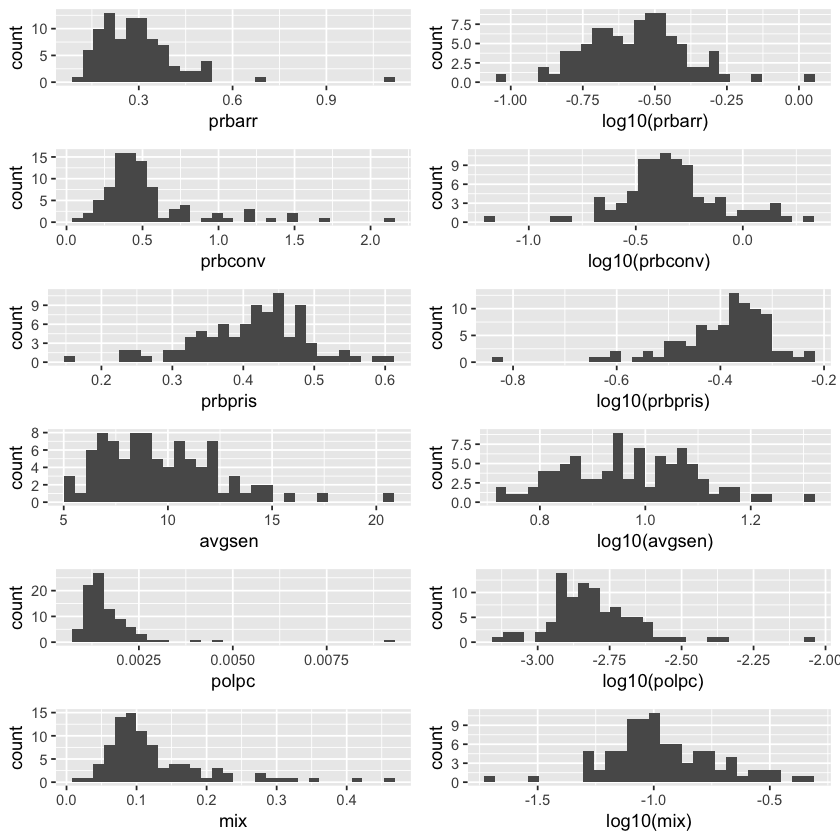

In [132]:
q1<-ggplot(data = dfCrime, aes(x = prbarr)) + 
      geom_histogram(bins=30)
q11<-ggplot(data = dfCrime, aes(x = log10(prbarr))) + 
      geom_histogram(bins=30) 
            
q2<-ggplot(data = dfCrime, aes(x = prbconv)) + 
      geom_histogram(bins=30)
q21<-ggplot(data = dfCrime, aes(x = log10(prbconv))) + 
      geom_histogram(bins=30)

q3<-ggplot(data = dfCrime, aes(x = prbpris)) + 
      geom_histogram(bins=30)
q31<-ggplot(data = dfCrime, aes(x = log10(prbpris))) + 
      geom_histogram(bins=30)

q4<-ggplot(data = dfCrime, aes(x = avgsen)) + 
      geom_histogram(bins=30)
q41<-ggplot(data = dfCrime, aes(x = log10(avgsen))) + 
      geom_histogram(bins=30)

q5<-ggplot(data = dfCrime, aes(x = polpc)) + 
      geom_histogram(bins=30)
q51<-ggplot(data = dfCrime, aes(x = log10(polpc))) + 
      geom_histogram(bins=30)

q6<-ggplot(data = dfCrime, aes(x = mix)) + 
      geom_histogram(bins=30)
q61<-ggplot(data = dfCrime, aes(x = log10(mix))) + 
      geom_histogram(bins=30)


grid.arrange(q1, q11, q2, q21, q3, q31, q4, q41, q5, q51, q6, q61, ncol=2)

The log transformation for these variables makes them more evenly distributed. We will convert these of variables to their log10 equivalents for our models.

In [133]:
dfCrime$logprbarr = log10(dfCrime$prbarr)
dfCrime$logprbconv = log10(dfCrime$prbconv)
dfCrime$logprbpris <- log10(dfCrime$prbpris)
dfCrime$logavgsen <- log10(dfCrime$avgsen)
dfCrime$logpolpc <-log10(dfCrime$polpc)
dfCrime$logmix <- log10(dfCrime$mix)

Next we take a look at the demographic histograms and their log alternatives

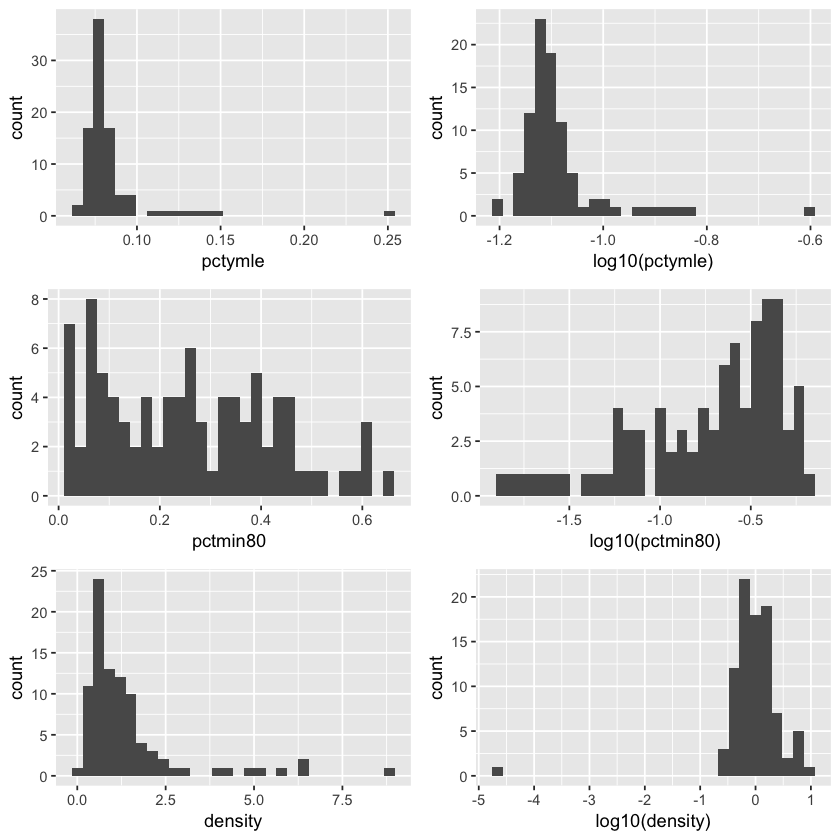

In [134]:
q1<-ggplot(data = dfCrime, aes(x = pctymle)) + 
      geom_histogram(bins=30)
q11<-ggplot(data = dfCrime, aes(x = log10(pctymle))) + 
      geom_histogram(bins=30) 
            
q2<-ggplot(data = dfCrime, aes(x = pctmin80)) + 
      geom_histogram(bins=30)
q21<-ggplot(data = dfCrime, aes(x = log10(pctmin80))) + 
      geom_histogram(bins=30)

q3<-ggplot(data = dfCrime, aes(x = density)) + 
      geom_histogram(bins=30)
q31<-ggplot(data = dfCrime, aes(x = log10(density))) + 
      geom_histogram(bins=30)


grid.arrange(q1, q11, q2, q21, q3, q31, ncol=2)

The shape after transformation do not appear to make the data more distributed. We'll leave these variables as they are for now.

Finally, we'll take a look at taxpc and the crmrte variable itself.

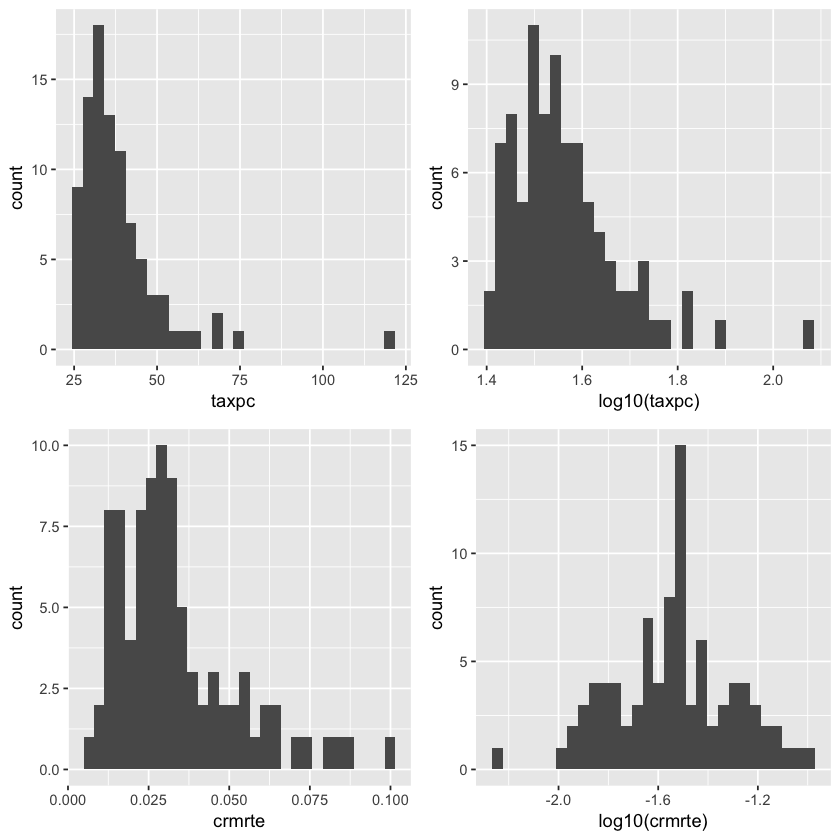

In [136]:
q1<-ggplot(data = dfCrime, aes(x = taxpc)) + 
      geom_histogram(bins=30)
q11<-ggplot(data = dfCrime, aes(x = log10(taxpc))) + 
      geom_histogram(bins=30) 
            
q2<-ggplot(data = dfCrime, aes(x = crmrte)) + 
      geom_histogram(bins=30)
q21<-ggplot(data = dfCrime, aes(x = log10(crmrte))) + 
      geom_histogram(bins=30)

grid.arrange(q1, q11, q2, q21, ncol=2)

The crmrte variable is more evenly distributed after transformation. We'll add that to our dataframe.

In [137]:
dfCrime$logcrmrte = log10(dfCrime$crmrte)

In [ ]:
#In case we want these later...
#dfCrime$logpctymle <- log10(dfCrime$pctymle)
#dfCrime$logdensity <- log10(dfCrime$density)
#dfCrime$logtaxpc <- log10(dfCrime$taxpc)
#dfCrime$logpctmin80 <- log10(dfCrime$pctmin80)

## Summary and Results

Commentary on the data. What we believe is operationalized. What we understand as ommitted.